# Assignment 8: Dimensionality Reduction

#### Student: Rodolfo Lerma

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

# Learning Objectives
- Be able to make application decisions regarding principal component analysis to train and test data 
- Produce a dimensionality reduction model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [12]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mnist.data.shape

(70000, 784)

As it is possible to see the data set contains 70000 data points with 784 features.

In [7]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
mnist.target.isnull().sum()

0

In this data set we do not have missing labels.

In [13]:
X = mnist.data / 255.0
y = mnist.target

### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Verification point for the size of the Test and Train Data sets

In [17]:
print(X_test.shape, y_test.shape)

(21000, 784) (21000,)


In [18]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


### Data Exploration

In [22]:
df = pd.concat([mnist.data, mnist.target], axis = 1) 
df['label'] = df['class'].apply(lambda i: str(i))
df = df.drop(['class'], axis = 1)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [39]:
df.to_csv (r'C:\Users\rodol\OneDrive\Documents\Training\UW\ML_Certificate\1_Intro_to_ML_510\8_Beyond_Linearity\export_dataframe.csv', index = False, header=True)

In [23]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [26]:
# feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
# df = pd.DataFrame(X,columns=feat_cols)
# df['y'] = y
# df['label'] = df['y'].apply(lambda i: str(i))
# X, y = None, None
# print('Size of the dataframe: {}'.format(df.shape))

# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

array([46730, 48393, 41416, ..., 54886,   860, 15795])

<Figure size 432x288 with 0 Axes>

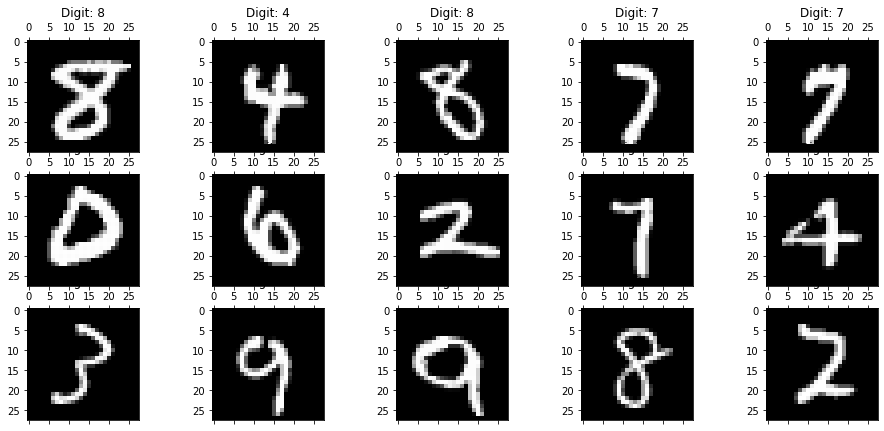

In [28]:
feat_cols = df.columns.tolist()
feat_cols.remove('label')
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### Question 2: Train a Logistic Regression classifier on the dataset. Set solver = lbfgs and random_state = 42. Hint you might also want to think about the multi_class parameter and if you need to set that.  You want to track how long the model takes to run.

In [29]:
from sklearn.linear_model import LogisticRegression
import time
#Initializing time for comparison
time_start = time.time()

lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)

lr.fit(X_train, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 53.2498996257782 seconds


### Question 3: Evaluate the resulting model on the test set.

In [30]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

The accuracy for this model is: 92.06%


### Question 4: Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [32]:
standardized_scalar = StandardScaler()
standardized_scalar.fit(X_train)
X_train_std = standardized_scalar.transform(X_train)
X_test_std = standardized_scalar.transform(X_test)

In [33]:
# Make an instance of the Model
pca = PCA(.95) #Contraint given to the PCA model to obtain a model that explain the 95% of variation

In [34]:
pca.fit(X_train_std)
print('Number of Components: {}'.format(pca.n_components_))

Number of Components: 327


In [36]:
#Transform the Features
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Question 5: Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Use the same criteria as before just with PCA. Was training much faster? Explain your results

In [38]:
time_start = time.time()

pca_lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)

pca_lr.fit(X_train_pca, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 36.95539879798889 seconds


### Question 6: Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

In [41]:
y_pred_pca = pca_lr.predict(X_test_pca)
lr_acc = accuracy_score(y_test, y_pred_pca)

print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

The accuracy for this model is: 92.2%


### Extra Analysis/Comparison

First we will explore how the data looks like with a 95% of Variace Explained compared to the original data set.

In [44]:
pca_new = PCA(.95)

In [47]:
lower_dimensional_data = pca_new.fit_transform(mnist.data)

In [48]:
pca_new.n_components_

154

In [68]:
approximation = pca_new.inverse_transform(lower_dimensional_data)
array = np.array(df[feat_cols].iloc[2].tolist())

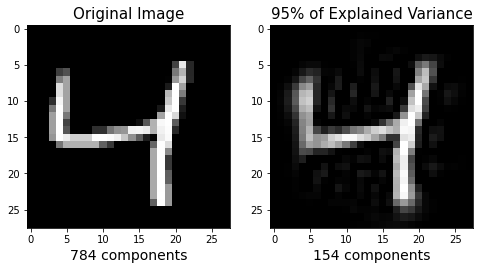

In [71]:
plt.figure(figsize=(8,4));

#Original Image
plt.subplot(1, 2, 1);
plt.imshow(array.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 15);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 15);

In [74]:
pca = PCA()
pca.fit(mnist.data)
pca.n_components_

784

In [75]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

3430023.448079478

In [76]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.746115922494749, 7.155444586878729, 6.149530980723043, 5.4033845285481785, 4.888933703877895]


In [77]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

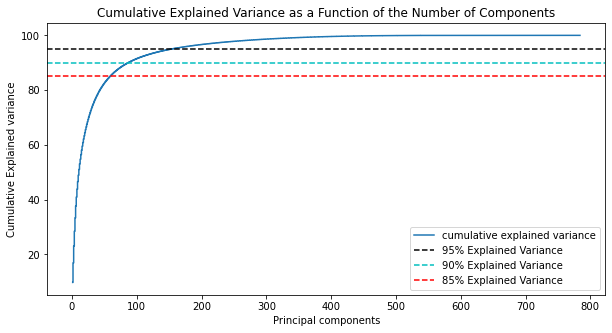

In [78]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [79]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [83]:
componentsVariance

[784, 331, 154, 87, 59]

In [84]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

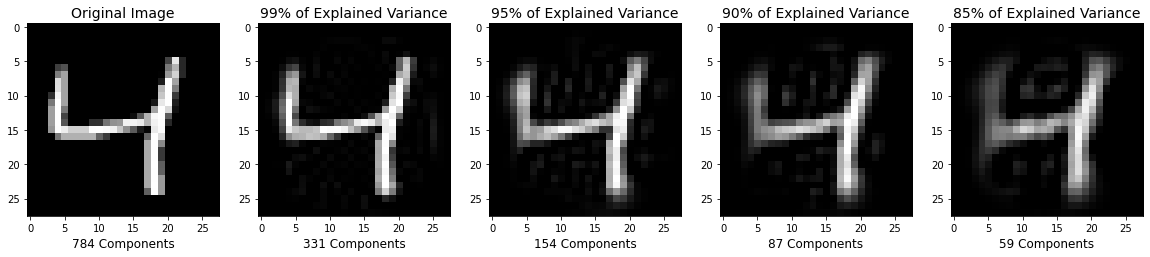

In [86]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(array.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

### Question 7. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: 
- What was your incoming experience with this model, if any? 
- What steps you took, 
- What obstacles you encountered. 
- How you link this exercise to real-world, machine learning problem-solving
- What steps were missing? 
- What else do you need to learn?

[Example to Review](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)